In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
import os

if os.name == 'posix':
    plt.rc('font', family='AppleGithic')
else:
     plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [50]:
%config inlineBackend.figure_format = 'retina'

In [51]:
df = pd.read_csv('국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949')
df.shape

(1000000, 34)

In [52]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [54]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [55]:
df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [59]:
df[df['총 콜레스테롤'].isnull()]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
7,2019,8,11,1,12,165,65,85.0,0.7,0.8,...,68.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2019,999993,41,1,7,170,65,75.1,1.2,1.2,...,15.0,1.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,...,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,...,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,...,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231


In [60]:
df.loc[df['총 콜레스테롤'].notna(), '총 콜레스테롤'].describe()

count    333549.000000
mean        196.367727
std          41.311458
min          50.000000
25%         169.000000
50%         195.000000
75%         221.000000
max        2389.000000
Name: 총 콜레스테롤, dtype: float64

<AxesSubplot:>

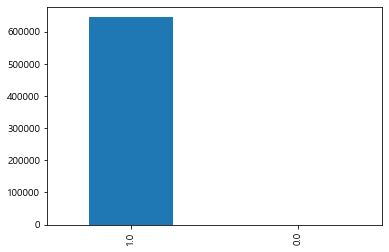

In [61]:
df['음주여부'].value_counts().plot.bar()

In [62]:
df['음주여부'] = df['음주여부'].fillna(0)

<AxesSubplot:>

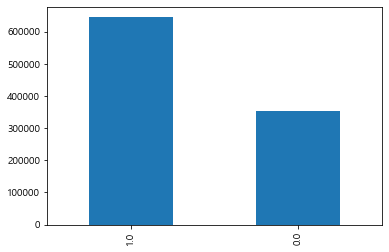

In [63]:
df['음주여부'].value_counts().plot.bar()

In [66]:
df.groupby(['성별코드']).mean()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2019.0,499943.367203,34.143945,10.319872,168.715592,70.791668,85.526902,1.024732,1.025189,1.033706,...,0.976586,28.391920,31.256262,48.280724,1.653023,0.772265,0.433338,0.230108,0.620437,20191231.0
2,2019.0,500062.288321,33.245661,10.687286,155.377561,55.748398,76.768034,0.914779,0.912291,1.032321,...,0.734583,23.885191,20.286610,23.281050,1.063203,0.507156,0.359117,0.183917,0.544569,20191231.0


In [68]:
df.groupby(['성별코드','흡연상태'])['가입자 일련번호'].count()

성별코드  흡연상태
1     1.0     180257
      2.0     339250
2     1.0     449969
      2.0      30358
Name: 가입자 일련번호, dtype: int64

In [72]:
df.groupby(['성별코드','흡연상태'])['감마 지티피'].agg(
['count','mean','median','min'])

count       mean  median  min
성별코드 흡연상태                                
1    1.0   179458  39.628721    27.0  1.0
     2.0   338133  52.872470    35.0  1.0
2    1.0   446653  22.726347    17.0  1.0
     2.0    30061  31.512391    20.0  1.0

In [75]:
df.pivot_table(index=['성별코드','흡연상태'],values='가입자 일련번호', aggfunc='count')

가입자 일련번호
성별코드 흡연상태          
1    1.0     180257
     2.0     339250
2    1.0     449969
     2.0      30358

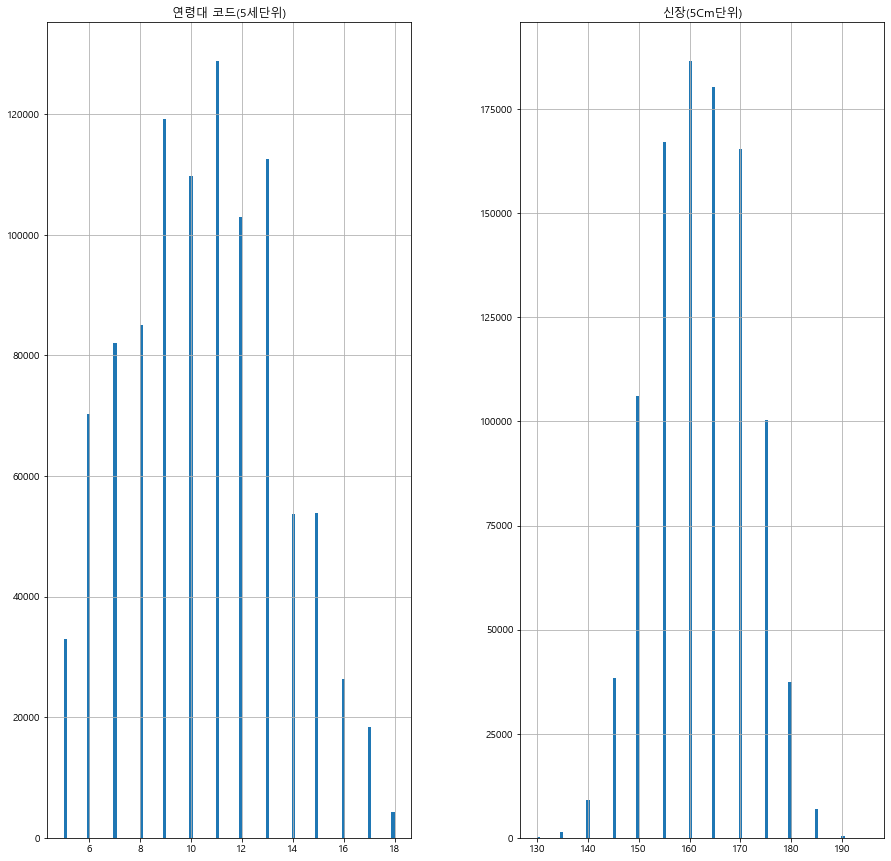

In [81]:
h = df.iloc[:,4:6].hist(figsize=(15,15), bins=100)

<AxesSubplot:>

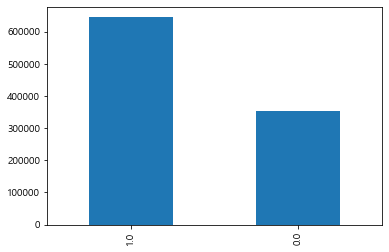

In [82]:
df['음주여부'].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

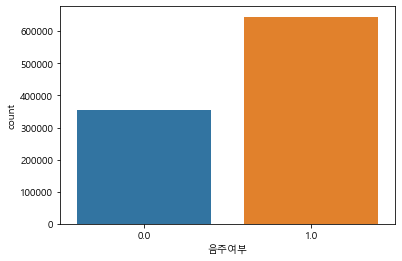

In [83]:
sns.countplot(data=df, x='음주여부')

<AxesSubplot:xlabel='음주여부', ylabel='count'>

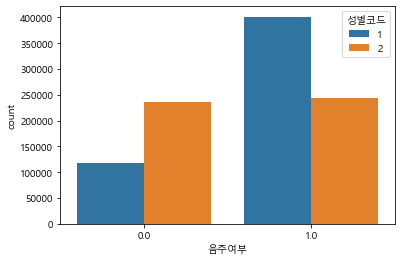

In [84]:
sns.countplot(data=df, x='음주여부',hue='성별코드')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

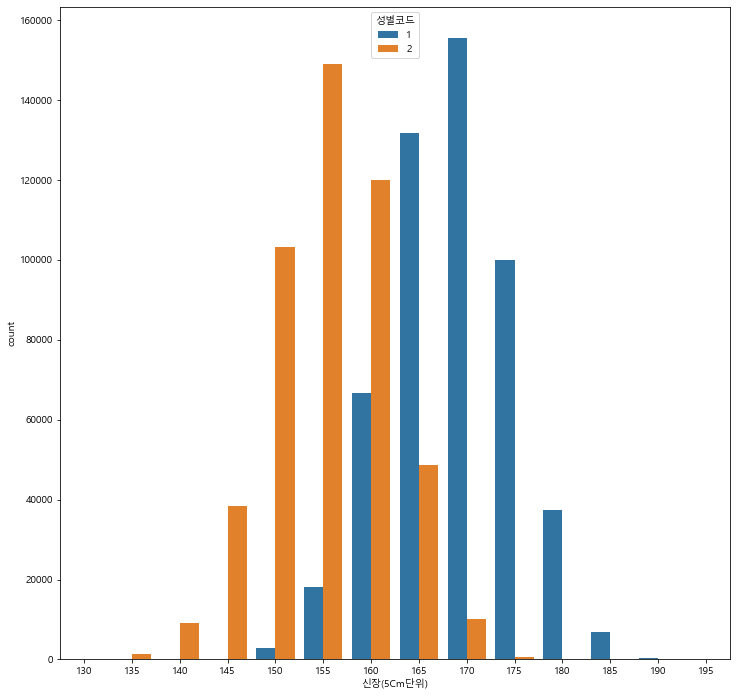

In [87]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, x='신장(5Cm단위)',hue='성별코드')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

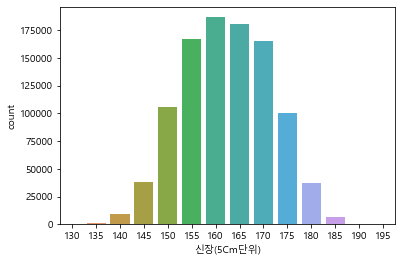

In [88]:
sns.countplot(data=df, x='신장(5Cm단위)')

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

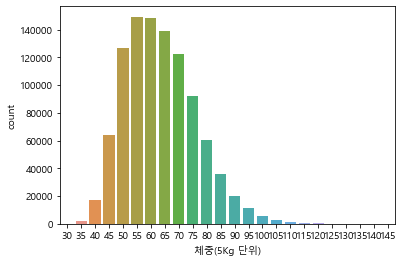

In [90]:
sns.countplot(data=df, x='체중(5Kg 단위)')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

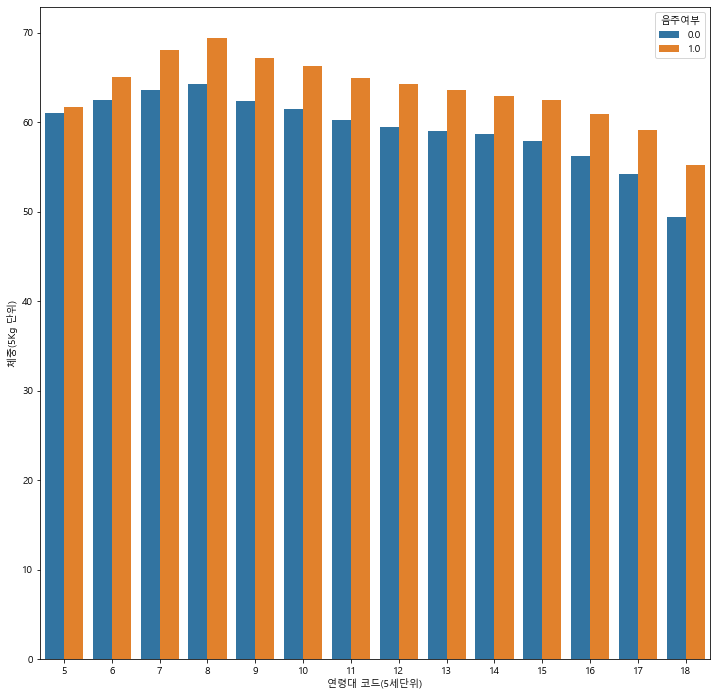

In [94]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None) 
# ci -> 신뢰구간

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

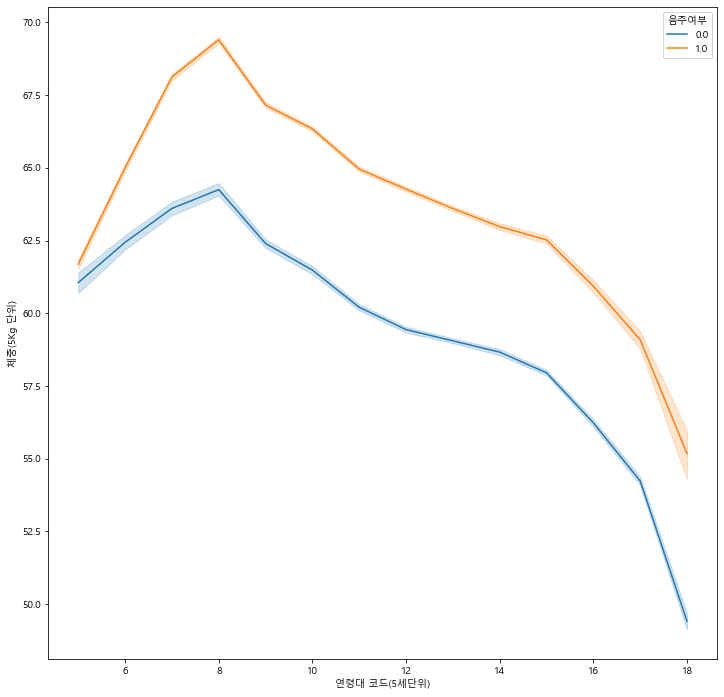

In [96]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=95) 
# ci -> 신뢰구간

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

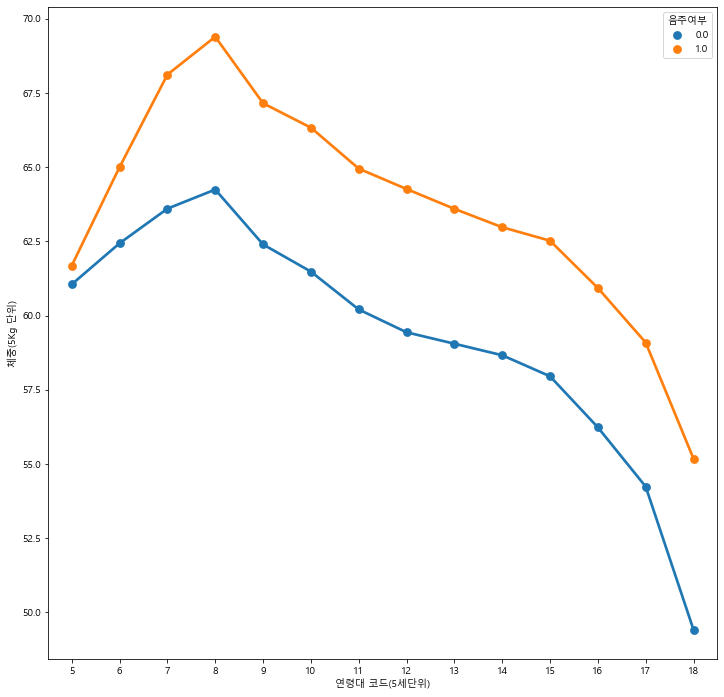

In [97]:
plt.figure(figsize=(12,12))
sns.pointplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None) 
# ci -> 신뢰구간

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

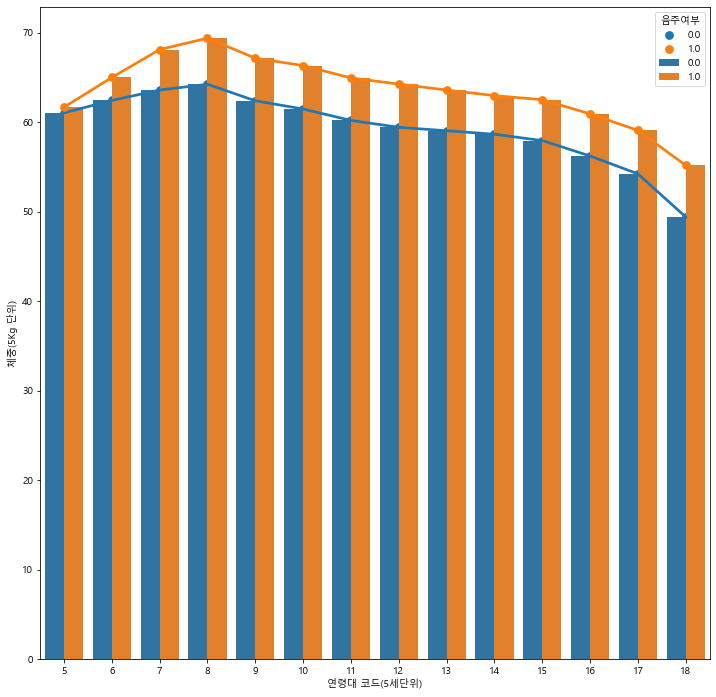

In [98]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None) 
sns.pointplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None) 
# ci -> 신뢰구간

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

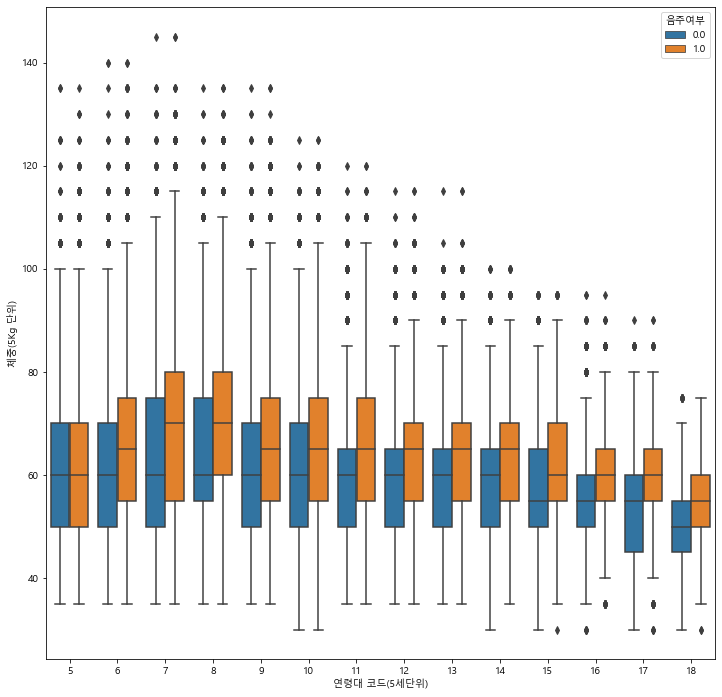

In [101]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부') 
# ci -> 신뢰구간

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

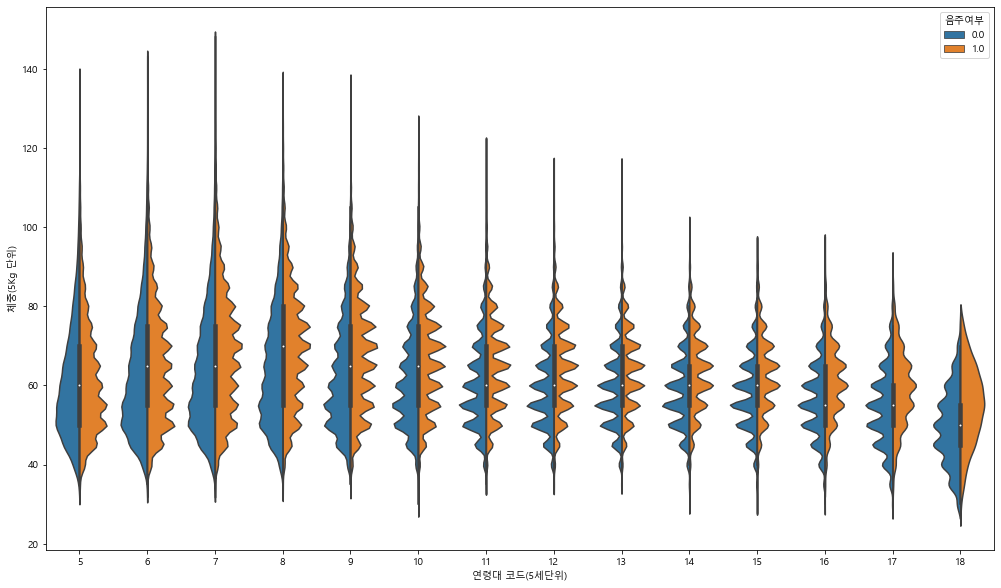

In [104]:
plt.figure(figsize=(17,10))
sns.violinplot(data=df, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부',split=True) 
# ci -> 신뢰구간

C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.9% of the points cannot be plac

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

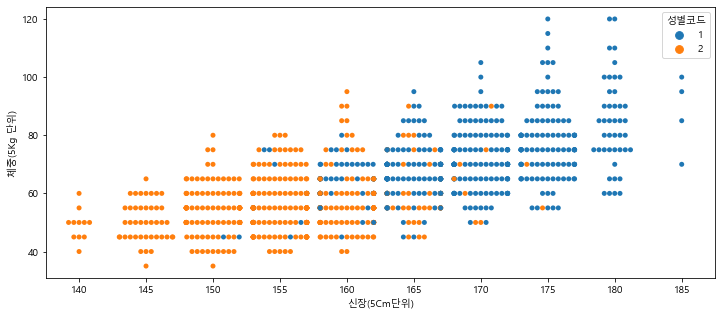

In [111]:
plt.figure(figsize=(12,5))
sns.swarmplot(data=df.sample(1000, random_state=2), x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='성별코드') 
# ci -> 신뢰구간

<AxesSubplot:xlabel='(혈청지오티)ALT', ylabel='(혈청지오티)AST'>

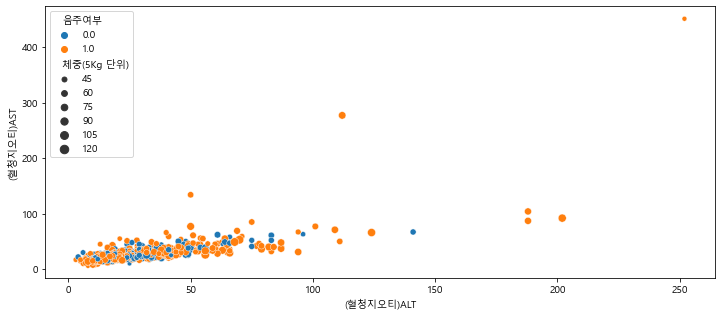

In [116]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df.sample(1000, random_state=2), x='(혈청지오티)ALT', y='(혈청지오티)AST', hue='음주여부', size='체중(5Kg 단위)') 
# ci -> 신뢰구간

<AxesSubplot:xlabel='(혈청지오티)ALT', ylabel='(혈청지오티)AST'>

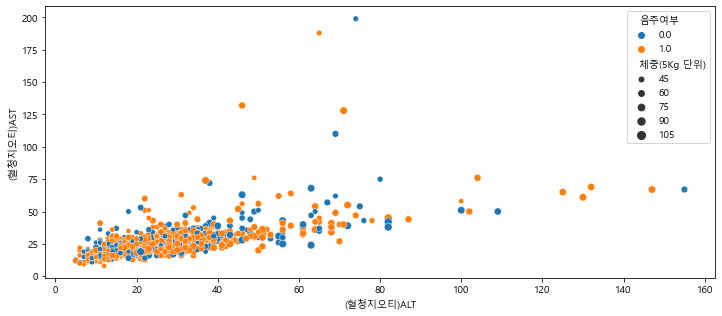

In [118]:
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=df[(df['(혈청지오티)ALT']<100)|(df['(혈청지오티)AST']<100)].sample(1000), 
    x='(혈청지오티)ALT', 
    y='(혈청지오티)AST', 
    hue='음주여부', 
    size='체중(5Kg 단위)') 
# ci -> 신뢰구간

AttributeError: 'PathCollection' object has no property 'col'

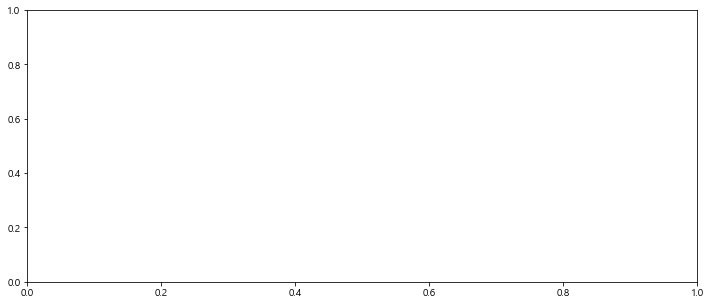

In [120]:
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=df.sample(100,random_state=1 ), 
    x='신장(5Cm단위)', 
    y='체중(5Kg 단위)', 
    hue='음주여부',
    col='성별코드'
) 
# ci -> 신뢰구간

In [124]:
df_chol = df.loc[df['총 콜레스테롤'].notnull() &(df['총 콜레스테롤']<400), '총 콜레스테롤']

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

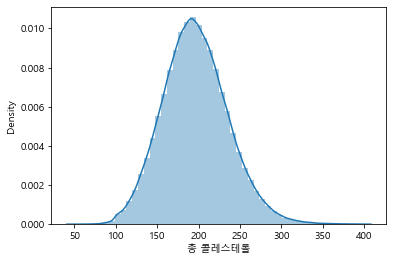

In [125]:
sns.distplot(df_chol, bins=50)

<AxesSubplot:xlabel='총 콜레스테롤', ylabel='Density'>

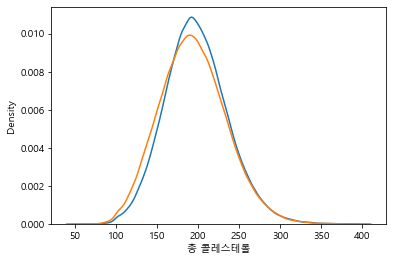

In [128]:
sns.kdeplot(df.loc[df['총 콜레스테롤'].notnull() &(df['총 콜레스테롤']<400)&(df['음주여부']==1), '총 콜레스테롤'], label='음주 중')
sns.kdeplot(df.loc[df['총 콜레스테롤'].notnull() &(df['총 콜레스테롤']<400)&(df['음주여부']==0), '총 콜레스테롤'], label='음주 안함')

In [129]:
df.loc[:50,"연령대 코드(5세단위)"].head()

0    13
1     5
2    13
3    12
4    10
Name: 연령대 코드(5세단위), dtype: int64

In [130]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [131]:
cor_columns = ['연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']

In [132]:
df_corr = df[cor_columns].corr()
df_corr

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.387673,-0.192033,0.155089,-0.170123,-0.159063,0.215426,0.211307,0.277371,0.105540,...,-0.043953,-0.072428,-0.151511,0.028113,0.031147,0.062737,-0.018532,0.022927,-0.047018,-0.350083
신장(5Cm단위),-0.387673,1.000000,0.668569,0.312287,0.135978,0.132631,-0.089741,-0.091464,0.036034,0.122911,...,-0.171636,-0.002571,0.522102,0.009703,0.173527,0.038068,0.146099,0.164283,0.463880,0.342778
체중(5Kg 단위),-0.192033,0.668569,1.000000,0.745654,0.086449,0.084269,-0.050345,-0.051637,0.254840,0.288263,...,-0.313285,0.026061,0.494448,0.031233,0.154060,0.100967,0.273238,0.226292,0.377806,0.223874
허리둘레,0.155089,0.312287,0.745654,1.000000,0.003168,0.004836,0.039969,0.037656,0.327497,0.289196,...,-0.346164,-0.000651,0.349410,0.045987,0.121318,0.116488,0.246382,0.224787,0.271147,0.051108
시력(좌),-0.170123,0.135978,0.086449,0.003168,1.000000,0.329405,-0.043824,-0.045078,-0.039837,0.002120,...,-0.006931,0.012175,0.082555,-0.007723,0.015216,-0.005009,0.018621,0.013682,0.055871,0.082926
시력(우),-0.159063,0.132631,0.084269,0.004836,0.329405,1.000000,-0.040051,-0.041190,-0.035310,0.004208,...,-0.005726,0.010752,0.083072,-0.011914,0.015277,-0.004747,0.018338,0.014815,0.055876,0.079920
청력(좌),0.215426,-0.089741,-0.050345,0.039969,-0.043824,-0.040051,1.000000,0.550273,0.064584,0.003989,...,-0.033925,-0.032992,-0.039517,0.018409,0.019009,0.010615,-0.011071,0.001285,-0.007931,-0.084517
청력(우),0.211307,-0.091464,-0.051637,0.037656,-0.045078,-0.041190,0.550273,1.000000,0.062405,0.003890,...,-0.032888,-0.033505,-0.041262,0.018727,0.017445,0.010342,-0.010984,0.001957,-0.012060,-0.085105
수축기 혈압,0.277371,0.036034,0.254840,0.327497,-0.039837,-0.035310,0.064584,0.062405,1.000000,0.729443,...,-0.089861,-0.012611,0.170150,0.055790,0.064552,0.079769,0.113250,0.160536,0.106501,-0.035542
이완기 혈압,0.105540,0.122911,0.288263,0.289196,0.002120,0.004208,0.003989,0.003890,0.729443,1.000000,...,-0.070504,0.049244,0.258979,0.041835,0.054998,0.078956,0.132054,0.182456,0.149256,0.059160


In [133]:
df_corr.loc[df_corr['신장(5Cm단위)']>0.1,'신장(5Cm단위)']

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.668569
허리둘레          0.312287
시력(좌)         0.135978
시력(우)         0.132631
이완기 혈압        0.122911
트리글리세라이드      0.130382
혈색소           0.522102
혈청크레아티닌       0.173527
(혈청지오티)ALT    0.146099
감마 지티피        0.164283
흡연상태          0.463880
음주여부          0.342778
Name: 신장(5Cm단위), dtype: float64

In [134]:
df_corr.loc[df_corr['음주여부']>0.2,'신장(5Cm단위)']

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.668569
혈색소           0.522102
흡연상태          0.463880
음주여부          0.342778
Name: 신장(5Cm단위), dtype: float64

<AxesSubplot:>

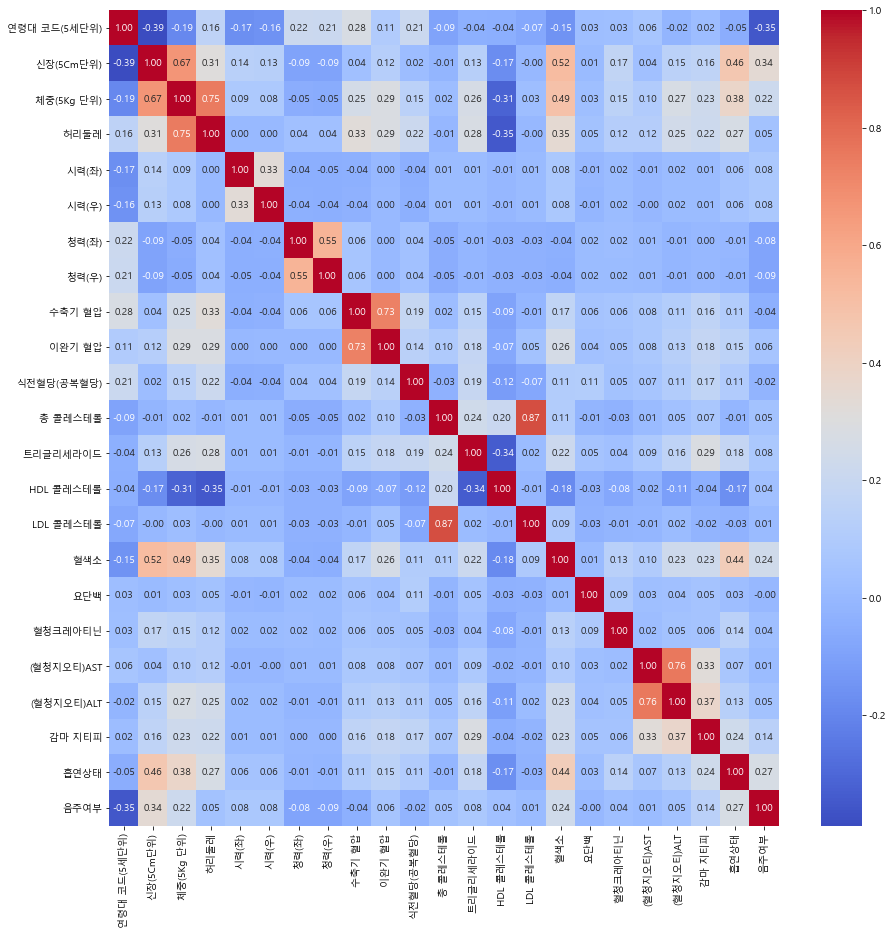

In [141]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr, annot=True, fmt='.2f', cmap='coolwarm')